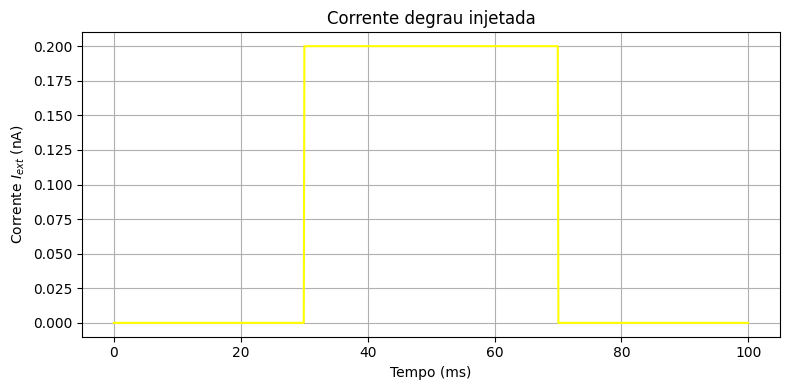

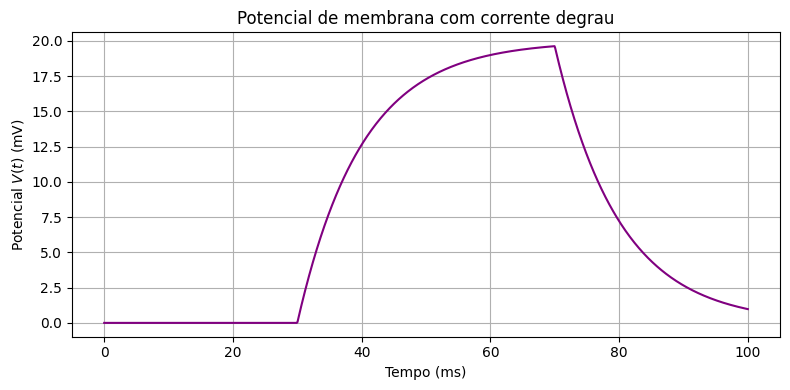

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Rm = 100
Cm = 0.1
tau = Rm * Cm  # ms

I0 = 0.2   # nA
V0 = 0.0   # mV

t = np.linspace(0, 100, 1000)

t_on = 30
t_off = 70

V = np.zeros_like(t)

for i in range(len(t)):
    if t[i] < t_on:
        V[i] = V0

    elif (t[i] >= t_on) and (t[i] <= t_off):
        V[i] = Rm * I0 * (1 - np.exp(-(t[i] - t_on)/tau))

    else:  # t[i] > t_off
        V_inf = Rm * I0 * (1 - np.exp(-(t_off - t_on)/tau))
        V[i] = V_inf * np.exp(-(t[i] - t_off)/tau)

I = np.zeros_like(t)
I[(t >= t_on) & (t <= t_off)] = I0

plt.figure(figsize=(8, 4))
plt.plot(t, I, color='yellow')
plt.title("Corrente degrau injetada")
plt.xlabel("Tempo (ms)")
plt.ylabel("Corrente $I_{ext}$ (nA)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(t, V, color='purple')
plt.title("Potencial de membrana com corrente degrau")
plt.xlabel("Tempo (ms)")
plt.ylabel("Potencial $V(t)$ (mV)")
plt.grid(True)
plt.tight_layout()
plt.show()